In [2]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping
from keras.models import load_model
from sklearn.metrics.pairwise import cosine_similarity
from keras.models import Model

import numpy as np
import matplotlib.pyplot as plt
from keras.applications.mobilenet_v2 import MobileNetV2

In [3]:
train = np.load('new_all.npy')

In [4]:
train = train.flatten()

In [5]:
type(train)

numpy.ndarray

In [6]:
X_train = train
X_train = np.stack(X_train, axis=0)

In [7]:
X_train.shape

(9995, 224, 224, 3)

In [8]:
train_1 = np.load('new_all_2.npy')

In [9]:
train_1 = train_1.flatten()

In [10]:
train_1 = np.stack(train_1, axis = 0)

In [11]:
train_1.shape

(9999, 224, 224, 3)

In [12]:
train_2 = np.load('new_all_3.npy')

In [13]:
train_2 = train_2.flatten()

In [14]:
train_2 = np.stack(train_2, axis = 0)

In [15]:
full_set = np.concatenate((X_train, train_1, train_2), axis = 0)

In [16]:
full_set.shape

(29993, 224, 224, 3)

In [17]:
model = MobileNetV2(input_shape=(224,224,3),include_top=True, weights='imagenet', pooling='max')

In [18]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [19]:
layer_name = 'global_average_pooling2d_1'

In [20]:
model_final= Model(inputs=model.input, outputs= model.get_layer(layer_name).output)

In [21]:
model_final.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [22]:
activations = model_final.predict(full_set, verbose = 1)

29993/29993 [==============================] - 98s 3ms/step


In [23]:
poster_similarities = cosine_similarity(activations)

In [24]:
poster_similarities.shape

(29993, 29993)

In [25]:
poster_similarities[10000].argsort()[::-1][:8]

array([10000, 15221,   988, 13495, 25993, 12090, 13829, 11166])

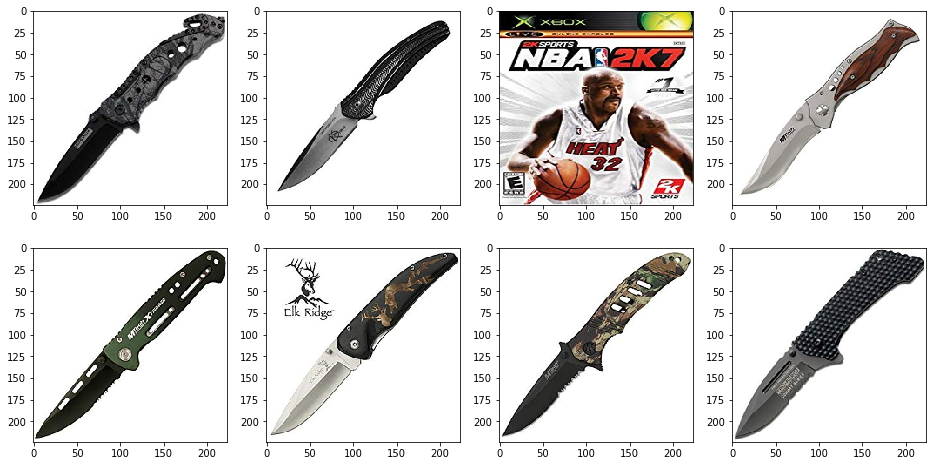

In [26]:
fig, ax = plt.subplots(figsize=(16,8))
plt.subplot(2,4,1)
plt.imshow(full_set[10000])

plt.subplot(2,4,2)
plt.imshow(full_set[15221])

plt.subplot(2,4,3)
plt.imshow(full_set[998])

plt.subplot(2,4,4)
plt.imshow(full_set[13495])

plt.subplot(2,4,5)
plt.imshow(full_set[25993])

plt.subplot(2,4,6)
plt.imshow(full_set[12090])

plt.subplot(2,4,7)
plt.imshow(full_set[13829])

plt.subplot(2,4,8)
plt.imshow(full_set[11166])

In [27]:
poster_similarities[5678].argsort()[::-1][:8]

array([ 5678, 12226, 13083, 19141, 19400, 13185, 29190,  2074])

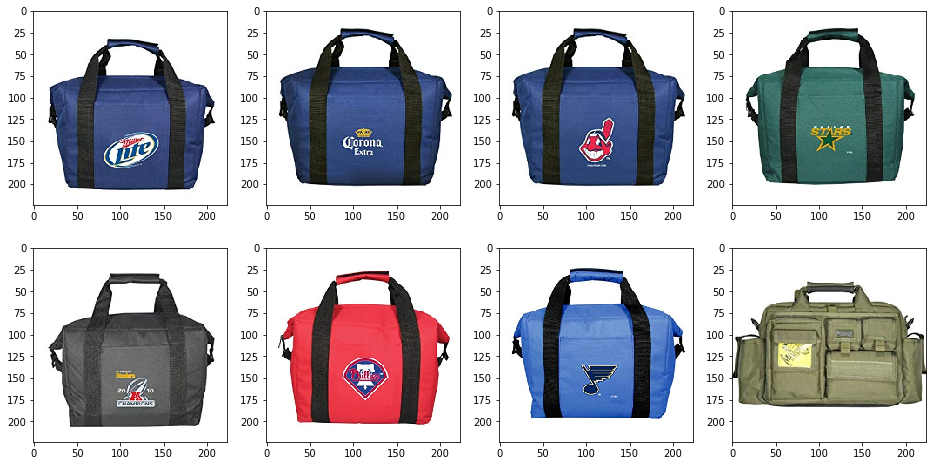

In [28]:
fig, ax = plt.subplots(figsize=(16,8))
plt.subplot(2,4,1)
plt.imshow(full_set[5678])

plt.subplot(2,4,2)
plt.imshow(full_set[12226])

plt.subplot(2,4,3)
plt.imshow(full_set[13083])

plt.subplot(2,4,4)
plt.imshow(full_set[19141])

plt.subplot(2,4,5)
plt.imshow(full_set[19400])

plt.subplot(2,4,6)
plt.imshow(full_set[13185])

plt.subplot(2,4,7)
plt.imshow(full_set[29190])

plt.subplot(2,4,8)
plt.imshow(full_set[2074])

In [29]:
poster_similarities[5500].argsort()[::-1][:8]

array([ 5500, 17914, 22682, 15831, 10580, 24986, 22916,  1057])

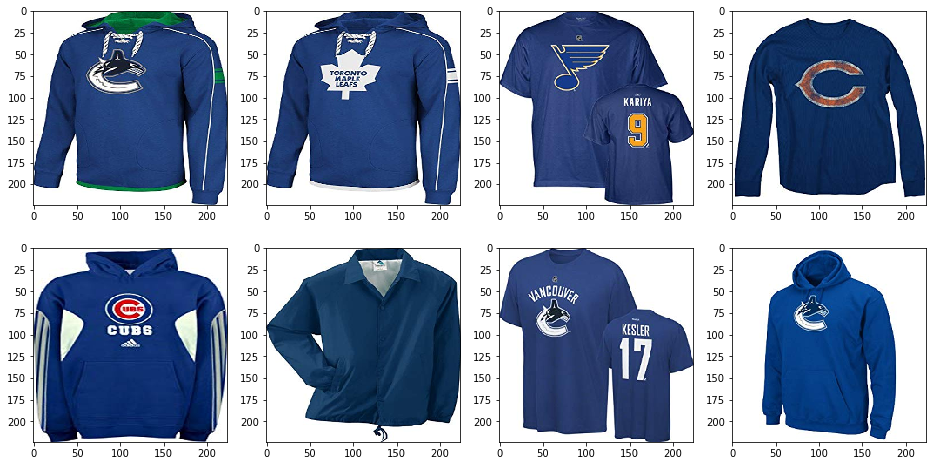

In [30]:
fig, ax = plt.subplots(figsize=(16,8))
plt.subplot(2,4,1)
plt.imshow(full_set[5500])

plt.subplot(2,4,2)
plt.imshow(full_set[17914])

plt.subplot(2,4,3)
plt.imshow(full_set[22682])

plt.subplot(2,4,4)
plt.imshow(full_set[15831])

plt.subplot(2,4,5)
plt.imshow(full_set[10580])

plt.subplot(2,4,6)
plt.imshow(full_set[24986])

plt.subplot(2,4,7)
plt.imshow(full_set[22916])

plt.subplot(2,4,8)
plt.imshow(full_set[1057])

In [31]:
poster_similarities[25422].argsort()[::-1][:8]

array([25422, 21958, 18465,  6046, 11651,  9255,  8035,  4187])

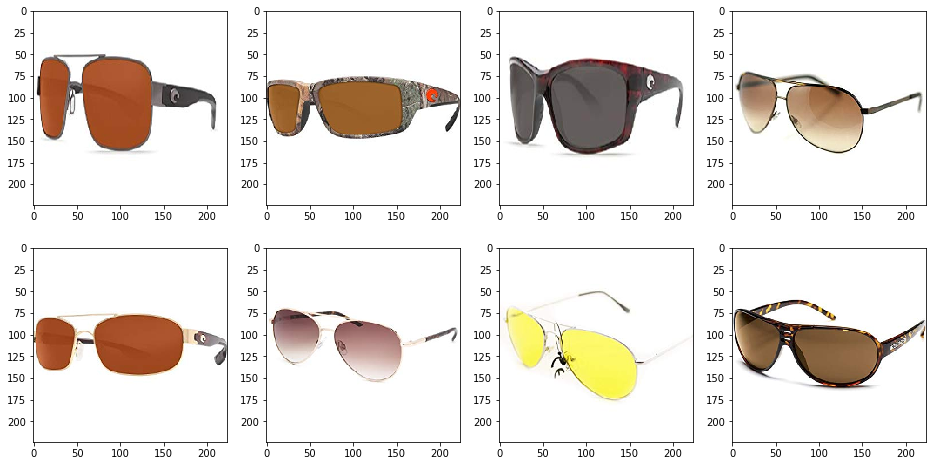

In [32]:
fig, ax = plt.subplots(figsize=(16,8))
plt.subplot(2,4,1)
plt.imshow(full_set[25422])

plt.subplot(2,4,2)
plt.imshow(full_set[21958])

plt.subplot(2,4,3)
plt.imshow(full_set[18465])

plt.subplot(2,4,4)
plt.imshow(full_set[6046])

plt.subplot(2,4,5)
plt.imshow(full_set[11651])

plt.subplot(2,4,6)
plt.imshow(full_set[9255])

plt.subplot(2,4,7)
plt.imshow(full_set[8035])

plt.subplot(2,4,8)
plt.imshow(full_set[4187])

In [33]:
poster_similarities[19001].argsort()[::-1][:8]

array([19001,  2572, 12821, 28244,  1789, 10843, 10208, 19282])

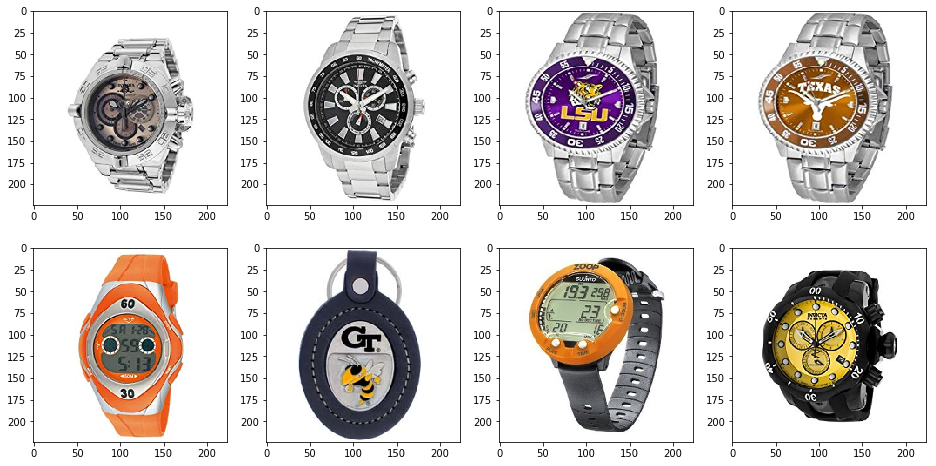

In [34]:
fig, ax = plt.subplots(figsize=(16,8))
plt.subplot(2,4,1)
plt.imshow(full_set[19001])

plt.subplot(2,4,2)
plt.imshow(full_set[2572])

plt.subplot(2,4,3)
plt.imshow(full_set[12821])

plt.subplot(2,4,4)
plt.imshow(full_set[28244])

plt.subplot(2,4,5)
plt.imshow(full_set[1789])

plt.subplot(2,4,6)
plt.imshow(full_set[10843])

plt.subplot(2,4,7)
plt.imshow(full_set[10208])

plt.subplot(2,4,8)
plt.imshow(full_set[19282])

In [35]:
poster_similarities[978].argsort()[::-1][:8]

array([  978, 12271,   374,  3232, 10128, 19693,  8308, 17062])

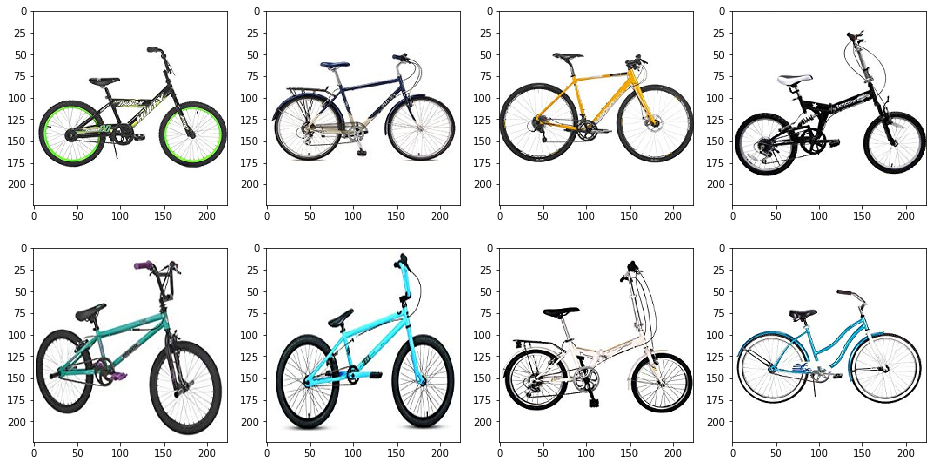

In [36]:
fig, ax = plt.subplots(figsize=(16,8))
plt.subplot(2,4,1)
plt.imshow(full_set[978])

plt.subplot(2,4,2)
plt.imshow(full_set[12271])

plt.subplot(2,4,3)
plt.imshow(full_set[374])

plt.subplot(2,4,4)
plt.imshow(full_set[3232])

plt.subplot(2,4,5)
plt.imshow(full_set[10128])

plt.subplot(2,4,6)
plt.imshow(full_set[19693])

plt.subplot(2,4,7)
plt.imshow(full_set[8308])

plt.subplot(2,4,8)
plt.imshow(full_set[17062])

In [37]:
poster_similarities[6666].argsort()[::-1][:8]

array([ 6666, 10359, 28492, 12380,  3351, 26981, 18893,  1599])

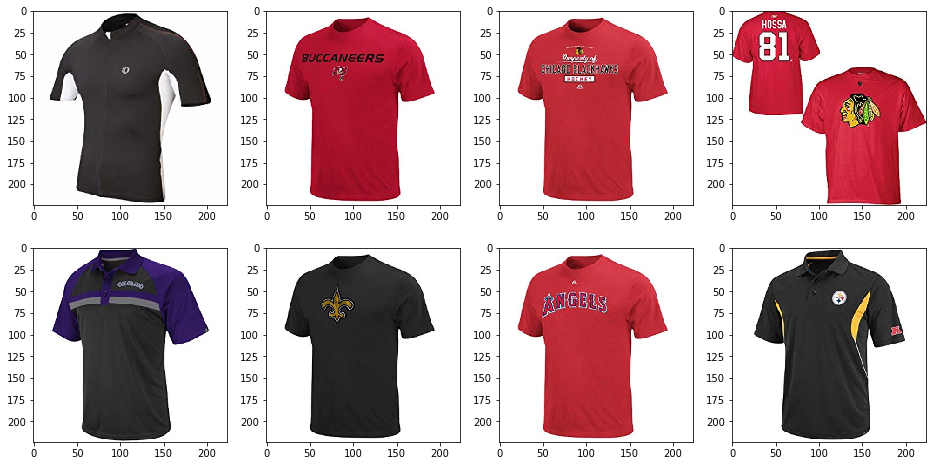

In [38]:
fig, ax = plt.subplots(figsize=(16,8))
plt.subplot(2,4,1)
plt.imshow(full_set[6666])

plt.subplot(2,4,2)
plt.imshow(full_set[10359])

plt.subplot(2,4,3)
plt.imshow(full_set[28492])

plt.subplot(2,4,4)
plt.imshow(full_set[12380])

plt.subplot(2,4,5)
plt.imshow(full_set[3351])

plt.subplot(2,4,6)
plt.imshow(full_set[26981])

plt.subplot(2,4,7)
plt.imshow(full_set[18893])

plt.subplot(2,4,8)
plt.imshow(full_set[1599])

In [39]:
poster_similarities[7777].argsort()[::-1][:8]

array([ 7777, 15914, 13066,  1965, 20493, 20120,  8159, 10158])

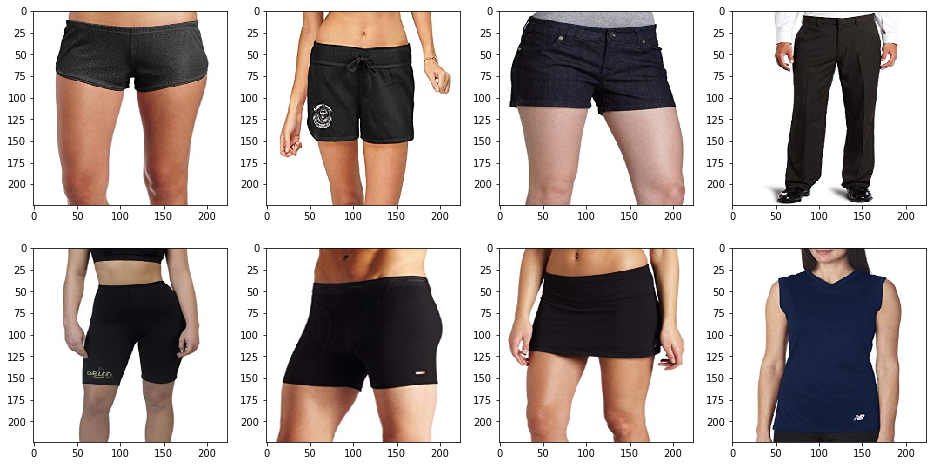

In [40]:
fig, ax = plt.subplots(figsize=(16,8))
plt.subplot(2,4,1)
plt.imshow(full_set[7777])

plt.subplot(2,4,2)
plt.imshow(full_set[15914])

plt.subplot(2,4,3)
plt.imshow(full_set[13066])

plt.subplot(2,4,4)
plt.imshow(full_set[1965])

plt.subplot(2,4,5)
plt.imshow(full_set[20493])

plt.subplot(2,4,6)
plt.imshow(full_set[20120])

plt.subplot(2,4,7)
plt.imshow(full_set[8159])

plt.subplot(2,4,8)
plt.imshow(full_set[10158])

In [41]:
poster_similarities[1774].argsort()[::-1][:8]

array([ 1774,  3998, 23047, 23742,  6245, 29522,  3519,  4212])

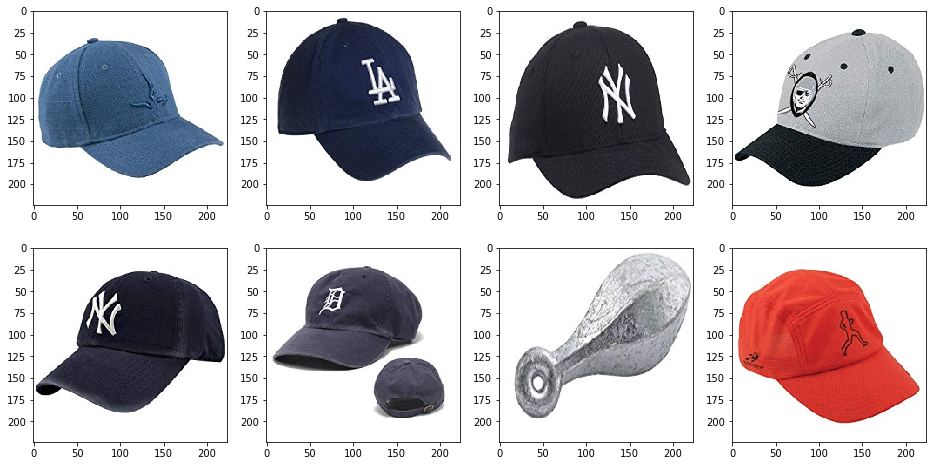

In [42]:
fig, ax = plt.subplots(figsize=(16,8))
plt.subplot(2,4,1)
plt.imshow(full_set[1774])

plt.subplot(2,4,2)
plt.imshow(full_set[3998])

plt.subplot(2,4,3)
plt.imshow(full_set[23047])

plt.subplot(2,4,4)
plt.imshow(full_set[23742])

plt.subplot(2,4,5)
plt.imshow(full_set[6245])

plt.subplot(2,4,6)
plt.imshow(full_set[29522])

plt.subplot(2,4,7)
plt.imshow(full_set[3519])

plt.subplot(2,4,8)
plt.imshow(full_set[4212])

In [43]:
poster_similarities[7321].argsort()[::-1][:8]

array([ 7321, 13474, 18686,  1625, 13669, 10714, 16423,  8971])

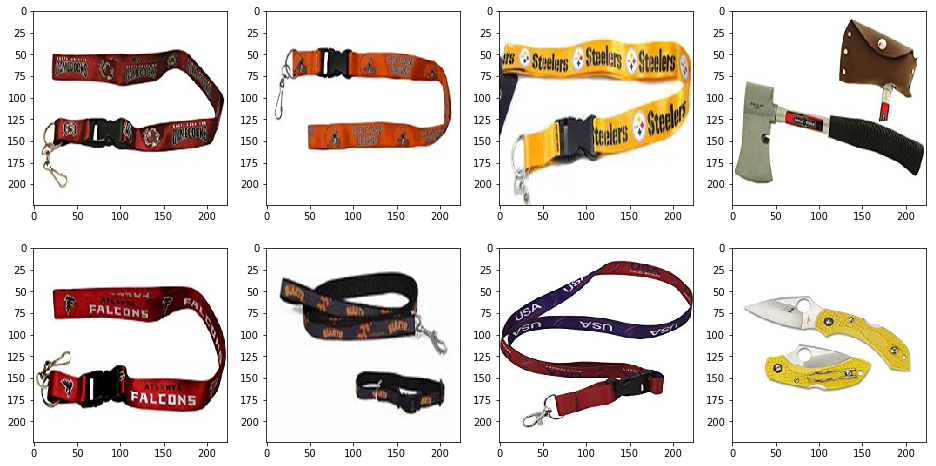

In [44]:
fig, ax = plt.subplots(figsize=(16,8))
plt.subplot(2,4,1)
plt.imshow(full_set[7321])

plt.subplot(2,4,2)
plt.imshow(full_set[13474])

plt.subplot(2,4,3)
plt.imshow(full_set[18686])

plt.subplot(2,4,4)
plt.imshow(full_set[1625])

plt.subplot(2,4,5)
plt.imshow(full_set[13669])

plt.subplot(2,4,6)
plt.imshow(full_set[10714])

plt.subplot(2,4,7)
plt.imshow(full_set[16423])

plt.subplot(2,4,8)
plt.imshow(full_set[8971])

In [45]:
poster_similarities[18643].argsort()[::-1][:8]

array([18643, 16937,  6970, 15818, 20911, 14789, 18761, 21506])

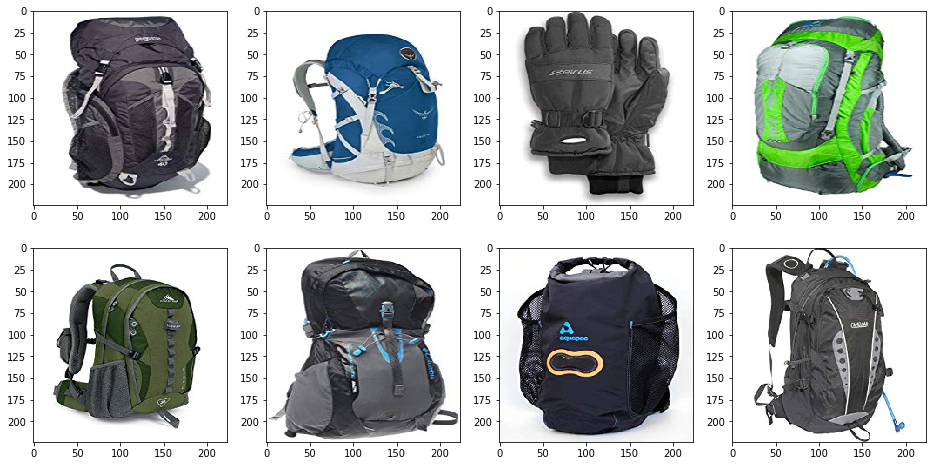

In [46]:
fig, ax = plt.subplots(figsize=(16,8))
plt.subplot(2,4,1)
plt.imshow(full_set[18643])

plt.subplot(2,4,2)
plt.imshow(full_set[16937])

plt.subplot(2,4,3)
plt.imshow(full_set[6970])

plt.subplot(2,4,4)
plt.imshow(full_set[15818])

plt.subplot(2,4,5)
plt.imshow(full_set[20911])

plt.subplot(2,4,6)
plt.imshow(full_set[14789])

plt.subplot(2,4,7)
plt.imshow(full_set[18761])

plt.subplot(2,4,8)
plt.imshow(full_set[21506])

In [47]:
poster_similarities[16666].argsort()[::-1][:8]

array([16666, 26484, 13268, 20159, 27512, 16934,  3314, 16974])

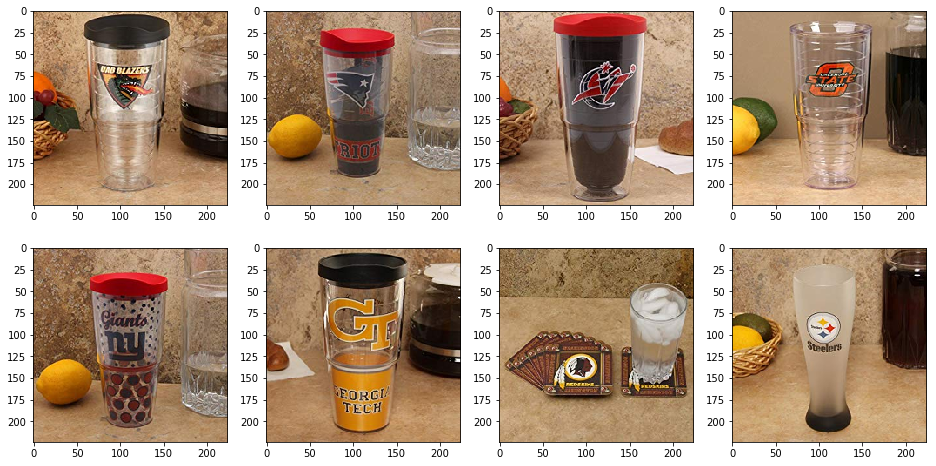

In [48]:
fig, ax = plt.subplots(figsize=(16,8))
plt.subplot(2,4,1)
plt.imshow(full_set[16666])

plt.subplot(2,4,2)
plt.imshow(full_set[26484])

plt.subplot(2,4,3)
plt.imshow(full_set[13268])

plt.subplot(2,4,4)
plt.imshow(full_set[20159])

plt.subplot(2,4,5)
plt.imshow(full_set[27512])

plt.subplot(2,4,6)
plt.imshow(full_set[16934])

plt.subplot(2,4,7)
plt.imshow(full_set[3314])

plt.subplot(2,4,8)
plt.imshow(full_set[16974])

In [49]:
poster_similarities[24473].argsort()[::-1][:8]

array([24473, 13892,  9188,  2689, 13507,    67, 25518, 24281])

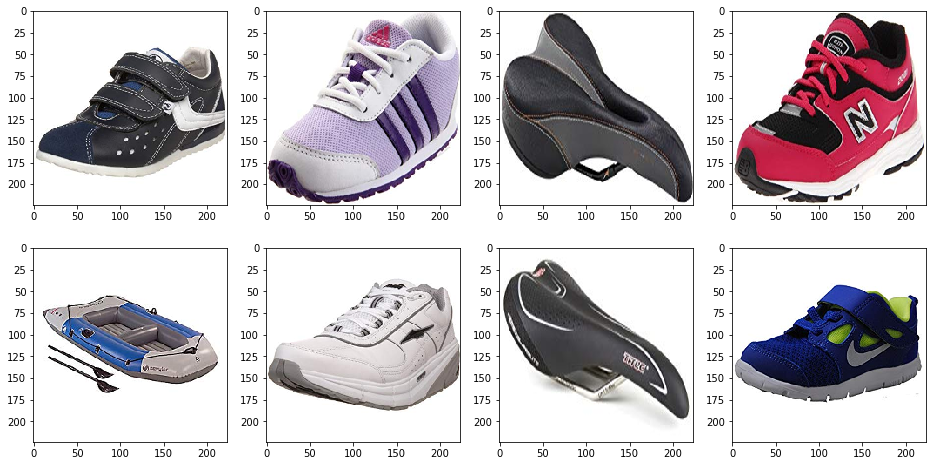

In [50]:
fig, ax = plt.subplots(figsize=(16,8))
plt.subplot(2,4,1)
plt.imshow(full_set[24473])

plt.subplot(2,4,2)
plt.imshow(full_set[13892])

plt.subplot(2,4,3)
plt.imshow(full_set[9188])

plt.subplot(2,4,4)
plt.imshow(full_set[2689])

plt.subplot(2,4,5)
plt.imshow(full_set[13507])

plt.subplot(2,4,6)
plt.imshow(full_set[67])

plt.subplot(2,4,7)
plt.imshow(full_set[25518])

plt.subplot(2,4,8)
plt.imshow(full_set[24281])